# Mi primera regresión logística

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Importar librerías

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.linear_model import LogisticRegression

## Carga de datos

In [2]:
digits = load_digits()

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
image = np.reshape(digits.data[9],(8,8))# es 8x8 porque la documentacion lo especifica
image

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

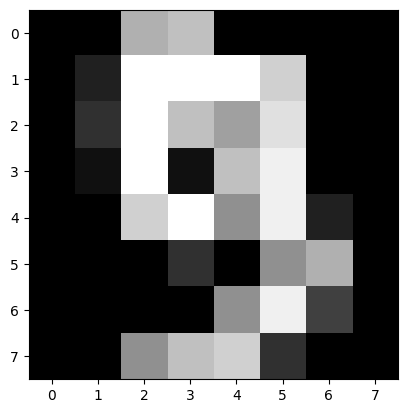

In [16]:
plt.imshow(image,cmap='gray')

In [17]:
digits.target[9] #vamos a entrenar a un modelo de regresion logistica que sea capaz de clasificar estos datos

9

## Split de datos en train y test

Esto es indispensable tener un grupo de datos de test y de train para evaluar al modelo 

In [18]:
from sklearn.model_selection import train_test_split
# train_test_split(datos de entrenamiento ,variable objetivo, test_size=porcentaje de prueba,random_state=0 replica los datos)
x_train , x_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2,random_state=0)

## Entrenamiento de modelo

In [22]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluación del modelo

In [23]:
predictions = logistic_reg.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix# nos dice cuantas predicciones se estan haciendo correctamente
cm = confusion_matrix(y_test,predictions)

In [28]:
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

los resulados nos dice cuantas veces se pedijo correctamente cada numero en nuestros datos 
en la primera columna se puede ver que el numero 0 lo hizo correctamente 27, en la segunda el numero 1 34 veces ect 

Text(0.5, 137.22222222222217, 'predicted label ')

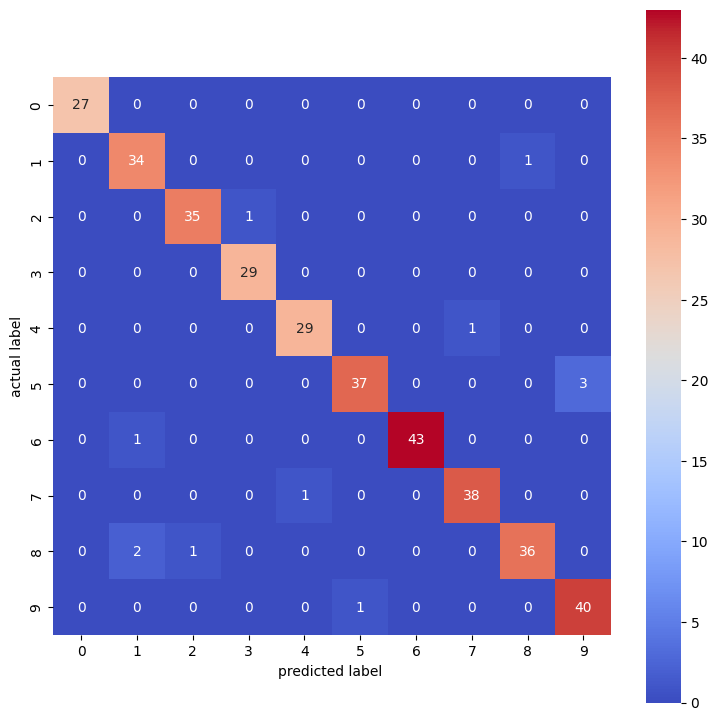

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,cmap='coolwarm',square=True)
plt.ylabel('actual label')
plt.xlabel('predicted label')

# Cuando usar la regresion logistica 

### Ventajas 

Fácil de implementar: Con sklearn es muy sencillo

Coeficientes interpretables: Puedo entender los coeficientes y ver cómo se aplican.

Inferencia: Puedes utilizar distintos features para ver cuál tiene más importancia para predecir tu variable dependiente.

**Clasificación en porcentajes: **No dice Sí y no, te da el porcentaje exacto de confianza {0,100}

Resultados con datasets lienealmente separables: cuando hay un comportamiento lineal es cuando hay mejores resultados 

### Desventajas

Asume la linealidad: Asume que todas las relaciones son lineales y no siempre es así.

Overfitting: Si pongo muchas features, este se aprende el patrón de entrenamiento en lugar de predecirlo.

Multicolinealidad: Dos características que tienen el mismo comportamiento

Datasets grandes: necesita datasets muy grandes para ser precisos.

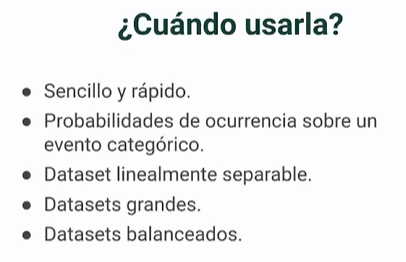

### diferencias 

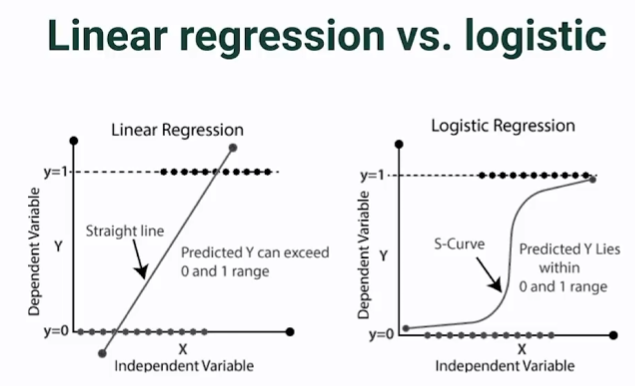

porque la regresion lineal no se utiliza en estos dataset categoricos la razon es porque la regresion logistica busca un punto para generar una linea recta y predecir el valores de una variable mientras que la regresion logistica tiene esta forma de S que lo que hace esque no excluye todas las variables, se puede ver que la regresion logistica inicia desde el punto 0,0 en el grafico y acaba en el punto 1,1 haciendo que no se excluyan las variables de los ejes x, de tal forma que se puedan clasificar las variables con 0 False y 1 True

# Fórmula de regresión logística


Funcion sigmoide 

La función sigmoide toma cualquier número real como entrada y devuelve un valor entre 0 y 1 como resultado. Su fórmula matemática es la siguiente:

f(x) = 1 / (1 + e^(-x))

Donde "e" es una constante matemática aproximadamente igual a 2.71828, conocida como el número de Euler. "x" representa el valor de entrada de la función.

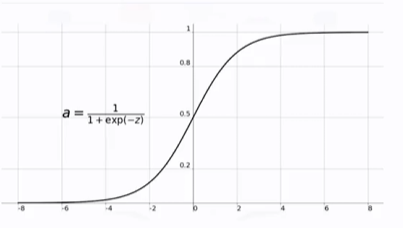

Lo interesante de la función sigmoide es que, sin importar el valor de entrada "x", siempre obtendremos un resultado entre 0 y 1. Si "x" es negativo, el término "e^(-x)" será mayor que 1, lo que hace que el denominador sea mayor que el numerador, y por lo tanto, el resultado será menor que 1, pero aún así, estará en el rango de 0 a 1. Por otro lado, si "x" es positivo, "e^(-x)" será menor que 1, y el resultado será mayor que 1, pero nuevamente, la función lo ajusta para que el resultado final siempre esté en el rango de 0 a 1.

resultados puros: [4.53978687e-05 6.69285092e-03 5.00000000e-01 9.93307149e-01
 9.99954602e-01]
resultados redondeados: [0. 0. 0. 1. 1.]


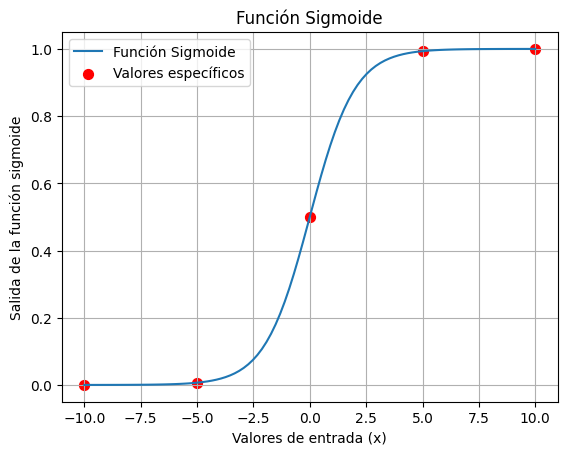

In [54]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

valores_de_entrada = np.array([-10, -5, 0, 5, 10])
resultados = sigmoid(valores_de_entrada)

print(f'resultados puros: {resultados}')
print(f"resultados redondeados: {resultados.round()}")

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y, label='Función Sigmoide')
plt.scatter(valores_de_entrada, resultados, color='red', label='Valores específicos', s=50)
plt.xlabel('Valores de entrada (x)')
plt.ylabel('Salida de la función sigmoide')
plt.title('Función Sigmoide')
plt.grid(True)
plt.legend()
plt.show()


Como puedes ver, sin importar si el valor de entrada es negativo o positivo, los resultados siempre están en el rango de 0 a 1, como se esperaba. Los valores más negativos están muy cerca de 0, mientras que los valores más positivos están muy cerca de 1. El valor de entrada 0 produce un resultado de 0.5, que es el punto medio de la función sigmoide. Esto demuestra la propiedad fundamental de la función sigmoide de mapear valores a un rango acotado entre 0 y 1.

no son 100 % valores de 1 o 0, son aproximaciones


¿Por qué es importante esta función? La función sigmoide es utilizada en muchas aplicaciones, especialmente en el campo de la inteligencia artificial y el aprendizaje automático. Por ejemplo, se utiliza en redes neuronales para asignar pesos a las conexiones entre neuronas y para calcular la probabilidad de que ciertos eventos ocurran.

Además, la función sigmoide tiene propiedades interesantes, como la derivada de la función, que es útil para optimizar algoritmos de aprendizaje y ajustar los parámetros de un modelo para que pueda hacer predicciones más precisas.

formula de la probabilidad 

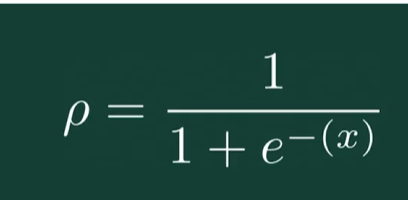

con odds (odds es la probabilidad de que algo ocurra sobre la probabilidad contraria )

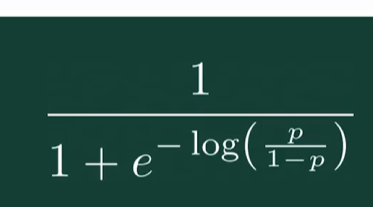


tenemos la probabilidad de que un evento sea exitoso del 80% y se confronta entre la probabilidad contraria 1 -(0.80)= 0.20 

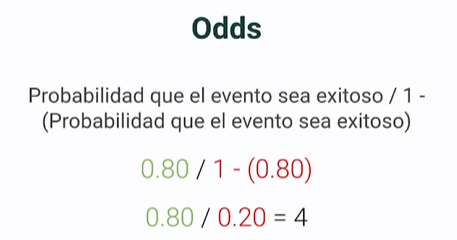

0.80/ 0.20 = 4 nos da el resultado de 4 (no es la probabilidad la probabilidad de que ocurra es de 0.80)
el 4 nos dice el ratio, osea es 4 veces mas probable de que sea 80% que 20%, este numero se puede remplazar por la x 

### Log odds 

le agregamos el logaritmo para que maneje mejor los infinitos positivos y negativos y hacerlo simetrico alrededor de 0 

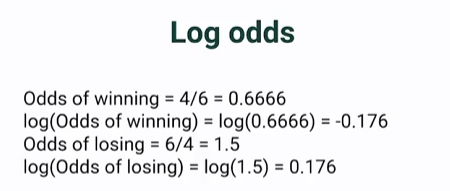

se hace 2 odds primero 4/6 y lueog 6/4 y nos da el mimo resultado pero diferente signo, pero lo importante es que queda todo alrededor del  0 que es mucho mas facil de graficar 

## formula de los odds

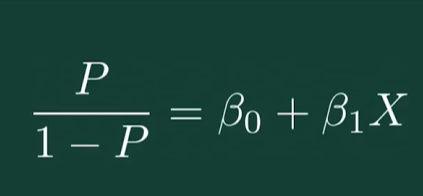

## formula de la regresion lineal 

se llama regresion logistica porque parte de una regresion lineal 

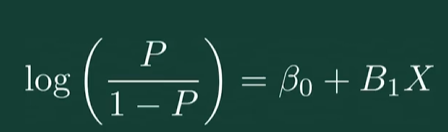

B0 intercepto B1 pendiente X variable Y clasificacion o regresion el valor continuo 
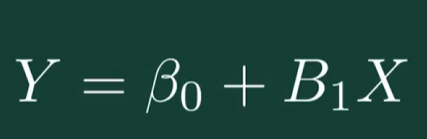

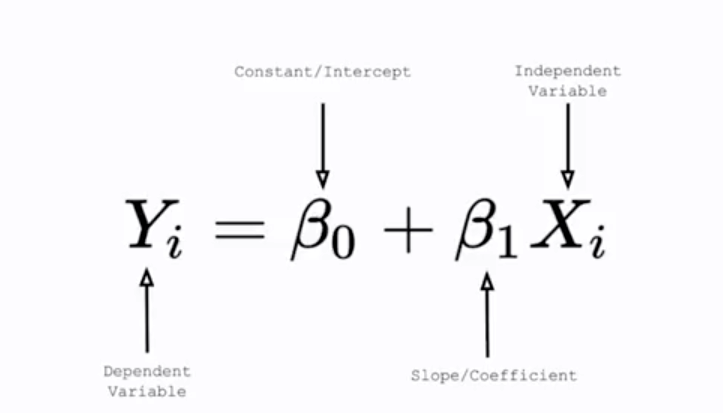

se toma la regresion lineal, se toma en terminos de probabilidad, se modifica para que de valores en un rango de 1 y 0 , se aplica el log

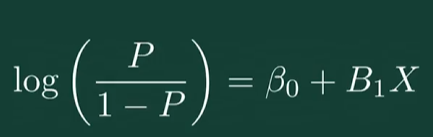


y obtenemos nuestra formula remplazando la x por la formula de la regresion lineal

la regresion lineal es la que resuelve la dependencia entre las variables de si es negativo o positivo 

y cuando se aplica en la funcion sigmoide te lo regresa en terminos de probabilidades 

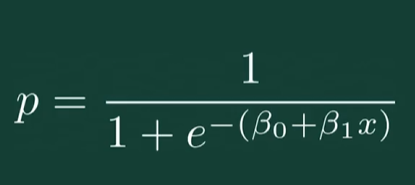



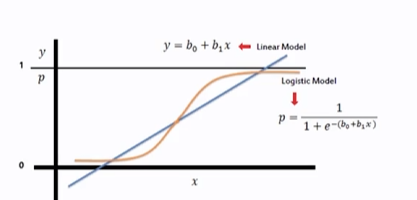